In [28]:
import glob
import pickle
import numpy as np
import random
import matplotlib.pyplot as plt

## Step 1 - Generate 10 Models
- Cruises are "chunked" to a maximum of 10e5 pts
- Training sets are O(10e6) pts

In [ ]:
#!cd ../..
#!python -m bathymetry pickle train-random USM2.config.json

## Step 2 - Score testing data on each model
- Testing set is similar size to train sets

In [ ]:
#!cd ../..
#!python -m bathymetry pickle test-all USM2.config.json

## Step 3 - Get mean and std of scores for testing data

In [19]:
scores_dir = '/cryosat2/ML_DATA/runtime_scores'
score_files = glob.glob(scores_dir + '/*.pkl')

for i,file in enumerate(score_files):
    with open(file,'rb') as f:
        (features, label, scores, weights) = pickle.load(f)
    if i == 0:
        n_pts = label.shape[0]
        n_scores = len(score_files)
        my_table = np.zeros((n_pts,n_scores+1))
        my_table[:,0] = label
    my_table[:,i+1] = scores

In [23]:
scores_std = my_table[:,1:].std(axis=1)
scores_mean = my_table[:,1:].mean(axis=1)

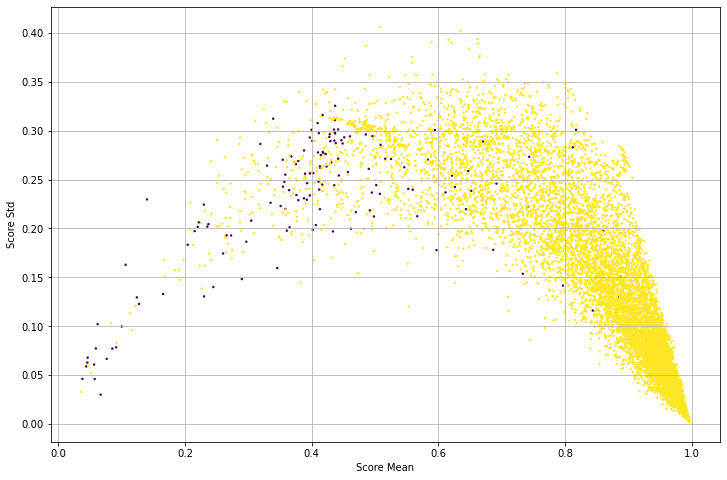

In [40]:
# plot a random subsample
idx = random.sample(range(my_table.shape[0]),10000)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(scores_mean[idx],scores_std[idx],s=2,c=my_table[[idx],0])
ax.grid(b=True)
ax.set_xlabel('Score Mean')
ax.set_ylabel('Score Std')
plt.show()